<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Ago18-19/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/olympic100m_men.txt",delimiter = ',').T
data

array([[1896.  , 1900.  , 1904.  , 1906.  , 1908.  , 1912.  , 1920.  ,
        1924.  , 1928.  , 1932.  , 1936.  , 1948.  , 1952.  , 1956.  ,
        1960.  , 1964.  , 1968.  , 1972.  , 1976.  , 1980.  , 1984.  ,
        1988.  , 1992.  , 1996.  , 2000.  , 2004.  , 2008.  ],
       [  12.  ,   11.  ,   11.  ,   11.2 ,   10.8 ,   10.8 ,   10.8 ,
          10.6 ,   10.8 ,   10.3 ,   10.3 ,   10.3 ,   10.4 ,   10.5 ,
          10.2 ,   10.  ,    9.95,   10.14,   10.06,   10.25,    9.99,
           9.92,    9.96,    9.84,    9.87,    9.85,    9.69]])

In [7]:
x=data[0]
y=data[1]

#Visualizando los datos

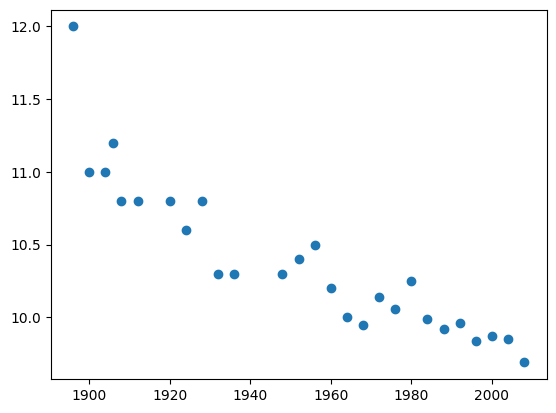

In [ ]:
plt.scatter(x,y)
plt.xlabel('Año olimpico')
plt.ylabel('tiempo 100m')

# Metodo de minimos cuadrados

## Ecuaciones

$$m=\frac{\sum x_i y_i-\sum x_i\sum y_i/N } {\sum x_i^2-(\sum x_i)^2/N} $$

$$b=\frac{\sum y_i -m\sum x_i}{N}$$


In [ ]:
#definimos las ecuaciones
def m_(x,y):
  n=len(x)
  m=(np.add.reduce(x*y)-(np.add.reduce(x)*np.add.reduce(y))/n)/(np.add.reduce(x**2)-(np.add.reduce(x))**2/n)
  return m
def b_(x,y):
  n=len(x)
  b=(np.add.reduce(y)-m_(x,y)*np.add.reduce(x))/(n)
  return b

In [ ]:
#alternatiba
def w(x,y):
  m=(np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
  b=np.mean(y)-m*np.mean(x)
  return m,b

In [ ]:
# Valores
m=m_(x,y)
b=b_(x,y)

print(m)
print(b)

-0.013330885710956546
36.416455902494945


$$\hat{y_i}=m x_i +b$$

In [24]:
# Dominio
x1=np.linspace(np.min(x),np.max(x),100)
f = lambda x,m,b :  m*x + b

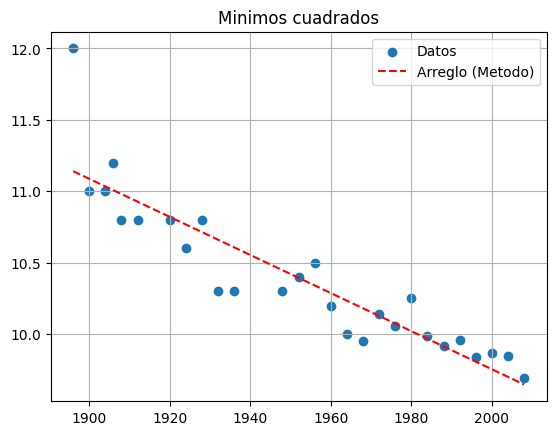

In [ ]:
#Grafico
plt.scatter(x,y,label='Datos')
plt.plot(x1,f(x1),'--r',label='Arreglo (Metodo)')
plt.grid()
plt.title('Minimos cuadrados')
plt.legend()

In [30]:
X=np.vstack((np.ones_like(x),x,x**2)).T
t=y
def w_m(x,t):
  w=np.linalg.inv(x.T@ x)@ x.T @t
  return w

In [34]:
def fun(x,w):
  y=0.0
  for i in range(0,len(w)):
    y += w[i]*x**i
  return y

In [31]:
w=w_m(X,t)
w

array([ 4.55597856e+02, -4.43160486e-01,  1.10151552e-04])

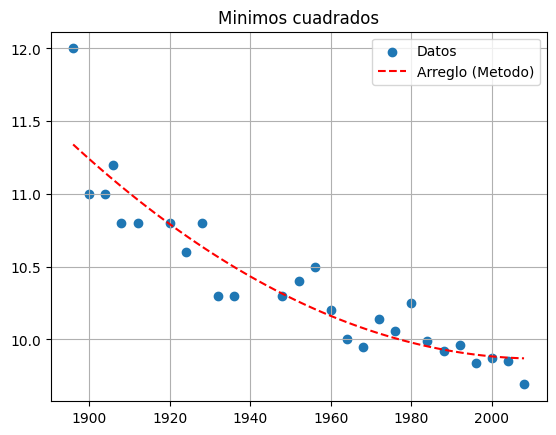

In [35]:
#Grafico
plt.scatter(x,y,label='Datos')
#plt.plot(x1,f_1(x1,w[1],w[0],w[2]),'--r',label='Arreglo (Metodo)')
plt.plot(x1,fun(x1,w),'--r',label='Arreglo (Metodo)')
plt.grid()
plt.title('Minimos cuadrados')
plt.legend()